---
# **RUN on dataset**
---

In [317]:
from pyVHR.analysis.pipeline import Pipeline
from pyVHR.analysis.stats import StatAnalysis
from pyVHR.plot.visualize import *
import os
import pandas as pd
import plotly.express as px
from numpy import round as r
import plotly.io as pio

# set the right renderer for plotly: 'jupyterlab', 'colab', etc
pio.renderers.default = 'jupyterlab'

# main functions 

def ANALYSIS(dataset, approach, metrics=['MAE'], j_data=False, writeFile=False):
  """Print boxplot analysis"""

  cd = os.getcwd() # current dir
  if not j_data:
    print('## Dataset: ' + dataset)
    print('   Approach: ' + approach)
    path = path_results + dataset + "_" + approach + ".h5"
    print('   h5      :', path)
    cfg = path_results + dataset + "_" + approach + ".cfg"
    print('   cfg     :', cfg, end='\n\n')
  else:
    print('## Path dir: ' + dataset)
    print('   Approach: ' + approach)
    path = path_results + dataset 
    print('   path  = ', path)

  filenameH5 = os.path.join(cd, path)
  
  # boxplot
  for m in metrics:
    st = StatAnalysis(filenameH5, join_data=j_data)
    if m=='MAE': 
      scale = 'log' 
    else: 
      scale = 'linear'
    fig = st.displayBoxPlot(metric=m, scale=scale)
    fig.show()
    if writeFile:
      filenamePNG = path_results + dataset + "_" + approach + "_" + m + "_MAE.png"
      fig.write_image(filenamePNG)  

def STATS(dataset, approach='clustering'):
  """Do stats analysis"""
  
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + approach + ".h5"
  df = pd.read_hdf(os.path.join(cd, path))

  # compute errors
  MAE_mean, MAE_std, MAE_median =    r(df['MAE'].mean()[0],2),  r(df['MAE'].std(),2),  r(df['MAE'].median(),2)
  RMSE_mean, RMSE_std, RMSE_median = r(df['RMSE'].mean()[0],2), r(df['RMSE'].std(),2), r(df['RMSE'].median(),2)
  PCC_mean, PCC_std, PCC_median =    r(df['PCC'].mean()[0],2),  r(df['PCC'].std(),2),  r(df['PCC'].median(),2)
  CCC_mean, CCC_std, CCC_median =    r(df['CCC'].mean()[0],2),  r(df['CCC'].std(),2),  r(df['CCC'].median(),2)
  SNR_mean, SNR_std, SNR_median =    r(df['SNR'].mean()[0],2),  r(df['SNR'].std(),2),  r(df['SNR'].median(),2)
  MAX_mean, MAX_std, MAX_median =    r(df['MAX'].mean()[0],2),  r(df['MAX'].std(),2),  r(df['MAX'].median(),2)

 # print table 
  table = [[MAE_mean, MAE_std, MAE_median], [RMSE_mean, RMSE_std, RMSE_median], [PCC_mean, PCC_std, PCC_median],
           [CCC_mean, CCC_std, CCC_median], [SNR_mean, SNR_std, SNR_median], [MAX_mean, MAX_std, MAX_median]]
  stats = pd.DataFrame(table, columns = [ 'MEANS', 'STD', 'MEDIANS'], index=['MAE', 'RMSE', 'PCC', 'CCC', 'SNR', 'MAX'])
  print('\n** Stats table **')
  print(stats)


def RUN(dataset, method):
  """Run methods on a dataset"""

  # set paths
  print('## Dataset: ' + dataset)
  print('Using...')
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + method + ".h5"
  print('   filename h5: ', path)
  cfg = path_results + dataset + "_" + method + ".cfg"
  print('   cfg        :', cfg)
  print('\n')

  # pipeline
  pl = Pipeline()
  res = pl.run_on_dataset(os.path.join(cd, cfg), verb=1)
  res.saveResults(filenameH5)
  print('Written file: ' + filenameH5 + '\n\n')

def DETAILS(dataset, method, metric='MAE'):
  """Show performance details on each video of the dataset"""

  # set paths
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + method + ".h5"
  print('## Dataset: ' + dataset)
  print('   filename h5: ', path)
  df = pd.read_hdf(os.path.join(cd, path))
  datasetname = df['dataset'][0].upper()
  methods = set(list(df['method']))

  # loop on methods
  for m in methods:
    print('   method     :', m)
    vals = df[df['method'] == m][metric]
    fvideos = df[df['method'] == m]['videoFilename']
    x = []
    y = []
    for i in vals.index:
      n = fvideos[i]
      n = n[n.rfind('/', 0, n.rfind('/'))+1:n.rfind('/')]
      x.append(n)
      y.append(vals[i][0])
    fig = px.bar(x=x, y=y, title='dataset: ' + datasetname + ' method: ' + m)
    fig.update_xaxes(type='category')
    fig.show()

This notebook shows the complete **pipeline** that takes a **dataset** as input and computes an **estimation** of **BPMs** using a prespecified set of **rPPG** **methods**.

Below are the possible choices for the methods.
* **Methods**: `cpu_CHROM`, `cupy_CHROM`, `torch_CHROM`, `cpu_LGI`, `cpu_POS`, `cupy_POS`, `cpu_PBV`, `cpu_PCA`, `cpu_GREEN`, `cpu_OMIT`, `cpu_ICA`, `cpu_SSR`

Below are the possible choices for the datasets.
* **Datasets**: `PURE`, `UBFC1`, `UBFC2`, `ECG_Fitness_01-1`, `ECG_Fitness_01-2`... `ECG_Fitness_06-1`, `ECG_Fitness_06-2`

# Runs

In [318]:
# run on dataset

path_results = "results/cfg/" # general path for cfg

#dataset = 'PURE'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')


# Analisys

## Dataset: LGI_PPGI
   Approach: holistic
   h5      : ../results/h5/LGI_PPGI_holistic.h5
   cfg     : ../results/h5/LGI_PPGI_holistic.cfg



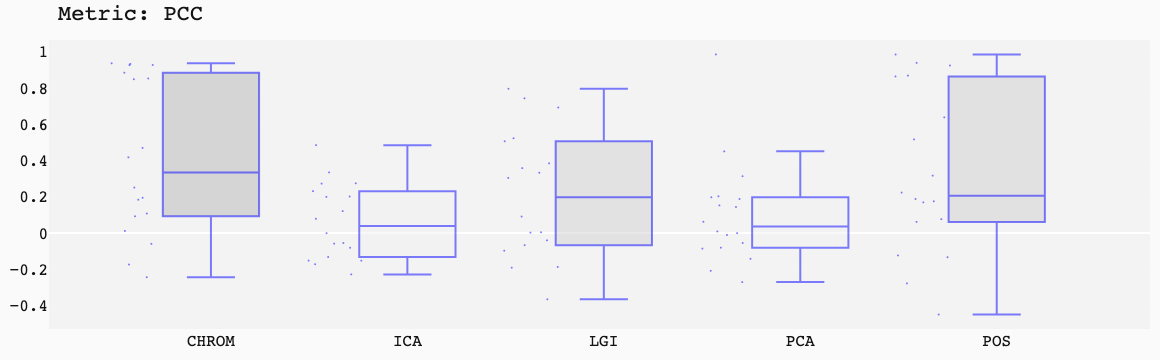


** Stats table **
      MEANS    STD  MEDIANS
MAE   11.77  10.45     8.56
RMSE  18.87  14.73    15.72
PCC    0.23   0.37     0.17
CCC    0.20   0.34     0.05
SNR    1.99   4.48     0.77
MAX   63.95  42.52    61.28


In [319]:
## -- Holistic

path_results = "../results/h5/" # general path for cfg# general path for data

dataset = 'LGI_PPGI'
ANALYSIS(dataset, 'holistic', metrics=['PCC'])
STATS(dataset, approach='holistic')

## Dataset: LGI_PPGI
   Approach: median
   h5      : ../results/h5/LGI_PPGI_median.h5
   cfg     : ../results/h5/LGI_PPGI_median.cfg



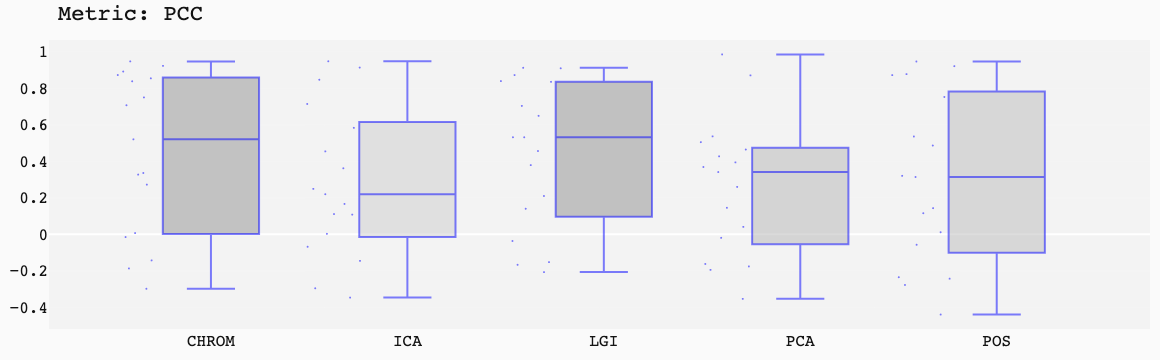


** Stats table **
      MEANS    STD  MEDIANS
MAE    7.59   8.39     4.94
RMSE  10.30  10.05     6.29
PCC    0.35   0.42     0.34
CCC    0.31   0.36     0.16
SNR    0.26   5.14    -1.13
MAX   30.50  26.56    19.54


In [320]:
## -- Median
ANALYSIS(dataset, 'median', metrics=['PCC'])
STATS(dataset, approach='median')

## Dataset: LGI_PPGI
   Approach: clustering
   h5      : ../results/h5/LGI_PPGI_clustering.h5
   cfg     : ../results/h5/LGI_PPGI_clustering.cfg



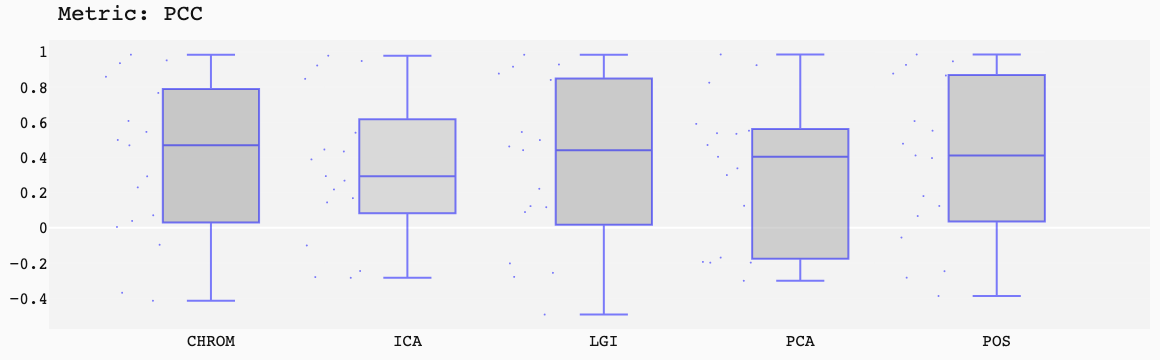


** Stats table **
      MEANS    STD  MEDIANS
MAE    7.42   8.84     4.32
RMSE   9.98  10.72     5.64
PCC    0.35   0.44     0.40
CCC    0.33   0.36     0.26
SNR    0.26   5.14    -1.13
MAX   25.48  23.76    17.64


In [321]:
## -- Clustering
ANALYSIS(dataset, 'clustering', metrics=['PCC'])
STATS(dataset, approach='clustering')

In [322]:
## -- Deep 
#ANALYSIS(dataset, 'deep', metrics=['PCC'])
#STATS(dataset, approach='deep')

# Details

## Dataset: LGI_PPGI
   filename h5:  ../results/h5/LGI_PPGI_holistic.h5
   method     : ICA


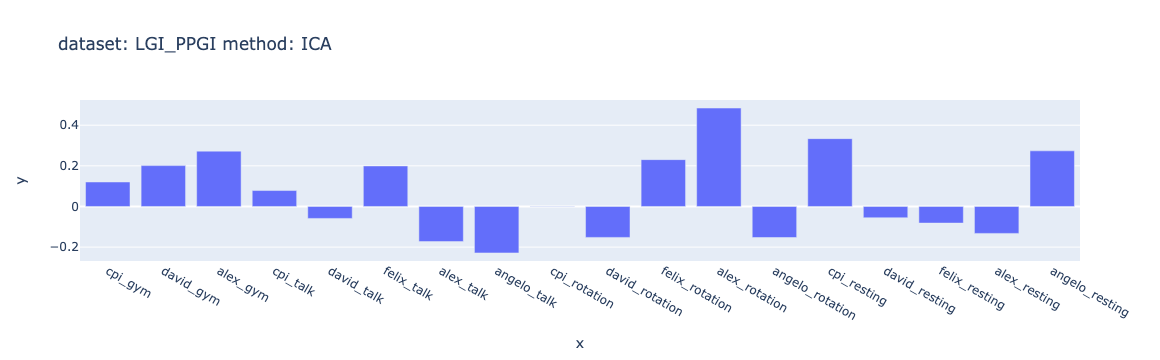

   method     : PCA


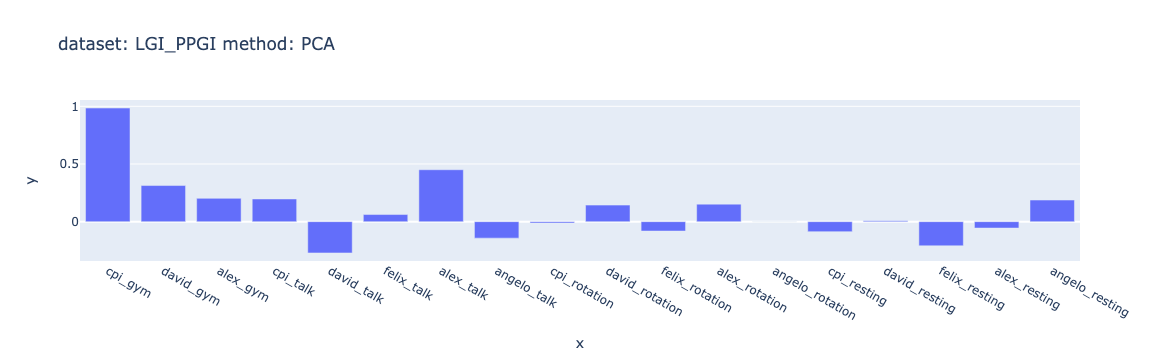

   method     : POS


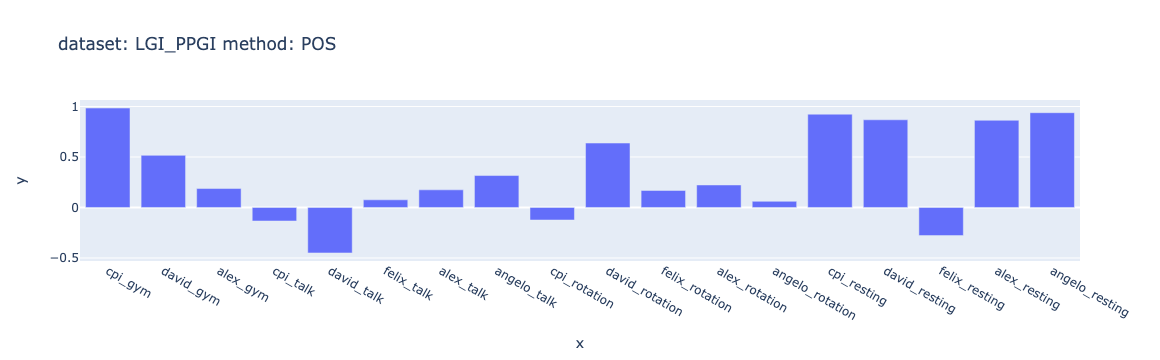

   method     : CHROM


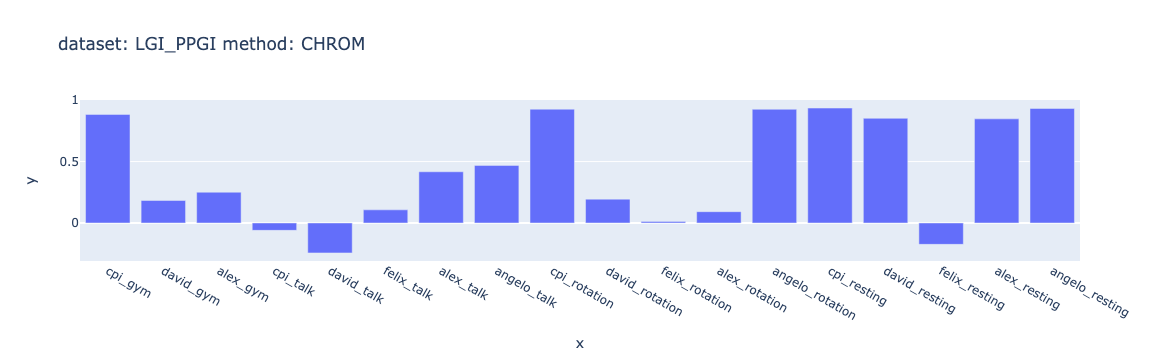

   method     : LGI


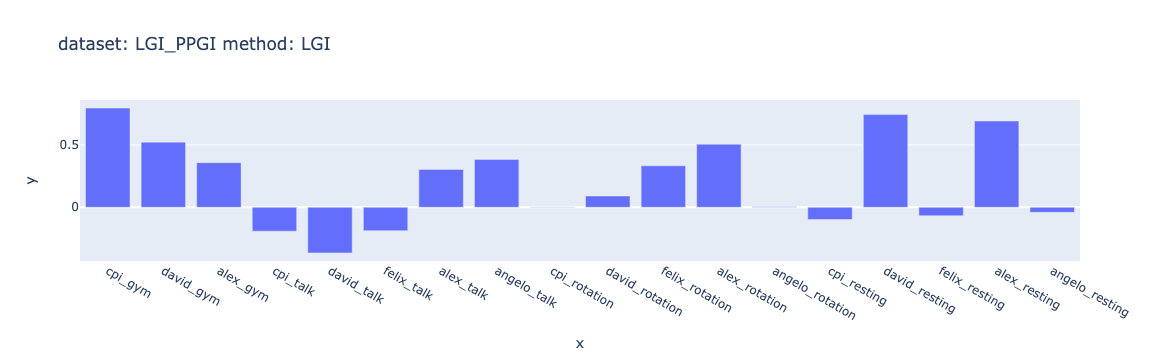

In [323]:
# holistic

method = 'holistic'
DETAILS(dataset, method, metric='PCC')

## Dataset: LGI_PPGI
   filename h5:  ../results/h5/LGI_PPGI_median.h5
   method     : ICA


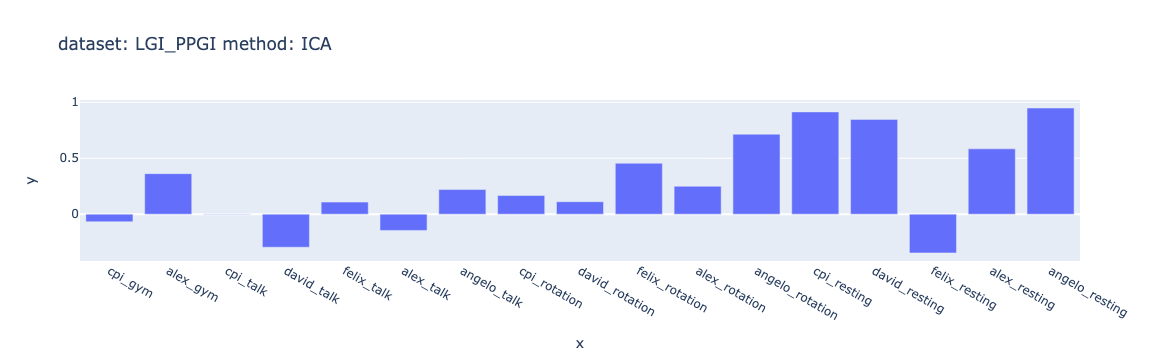

   method     : PCA


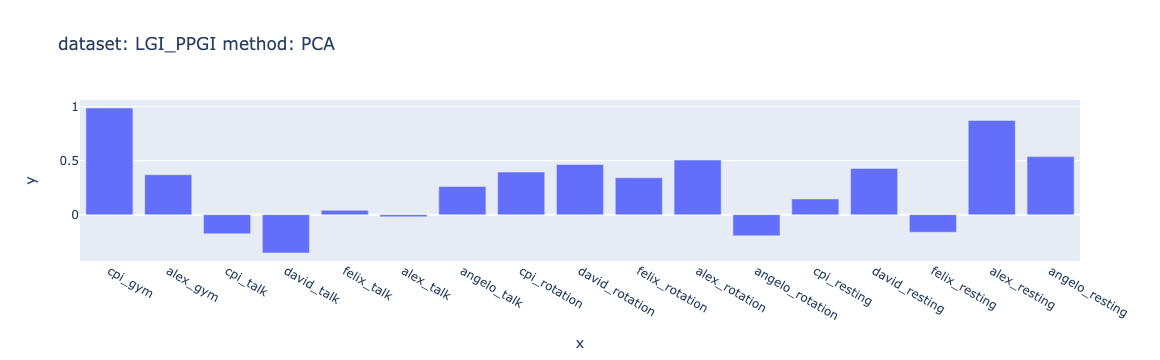

   method     : POS


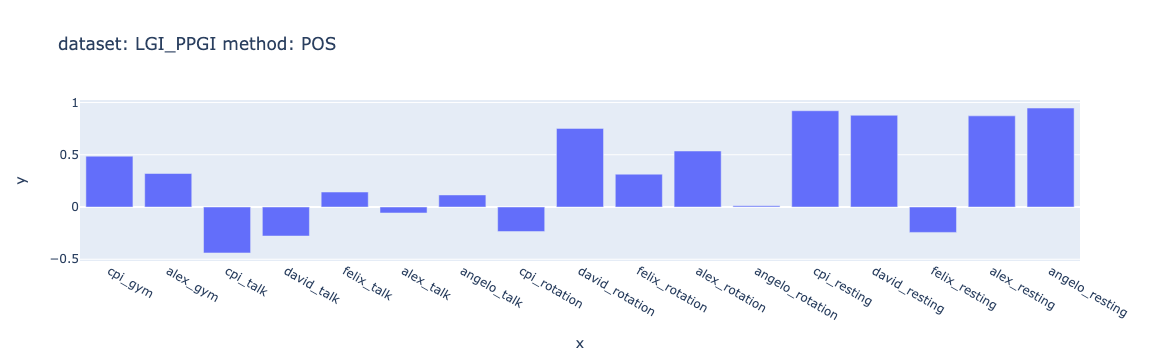

   method     : CHROM


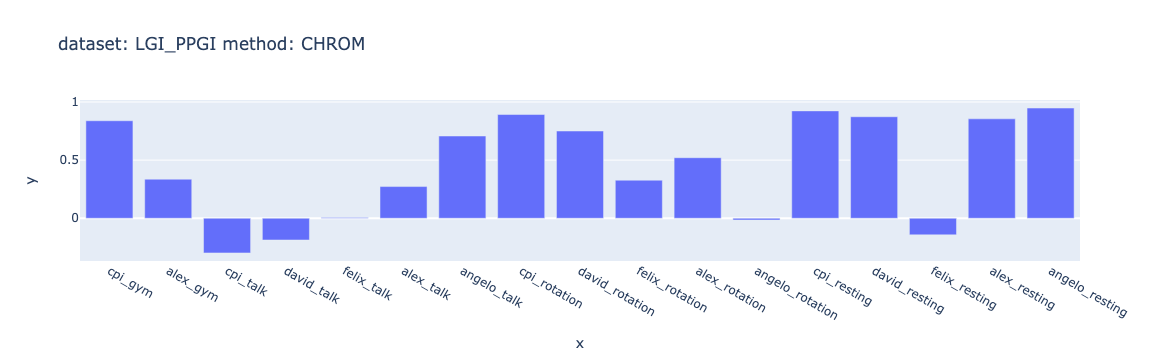

   method     : LGI


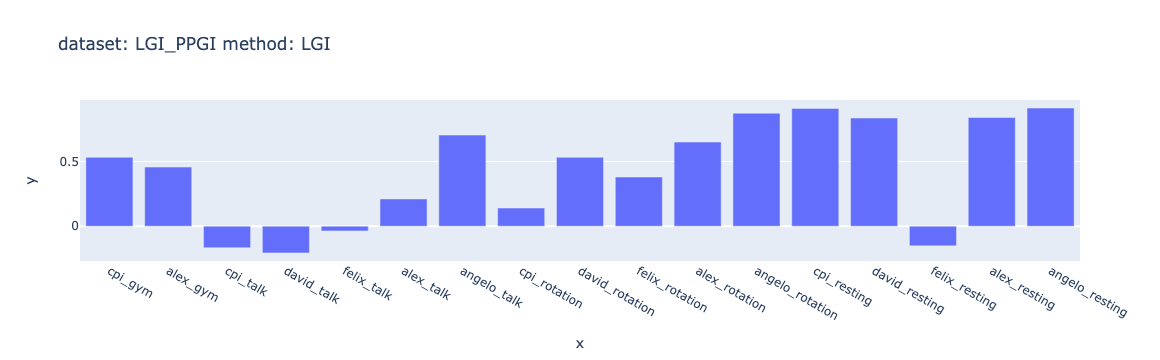

In [324]:
# median

method = 'median'
DETAILS(dataset, method, metric='PCC')

## Dataset: LGI_PPGI
   filename h5:  ../results/h5/LGI_PPGI_clustering.h5
   method     : ICA


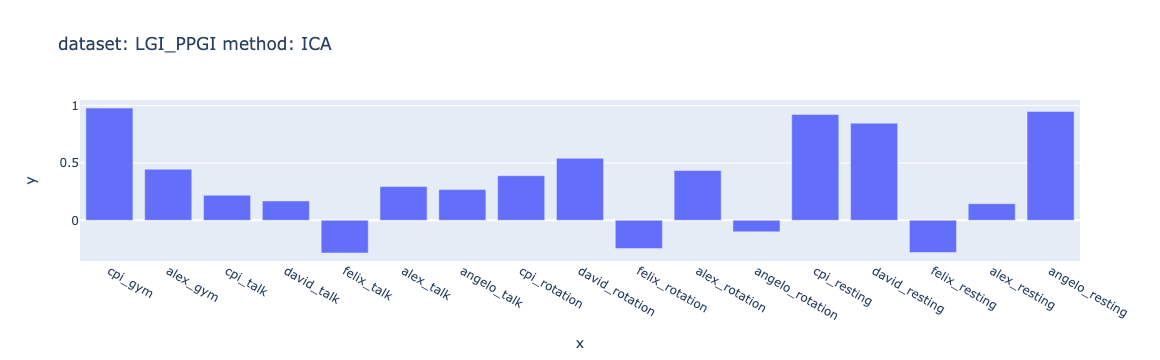

   method     : PCA


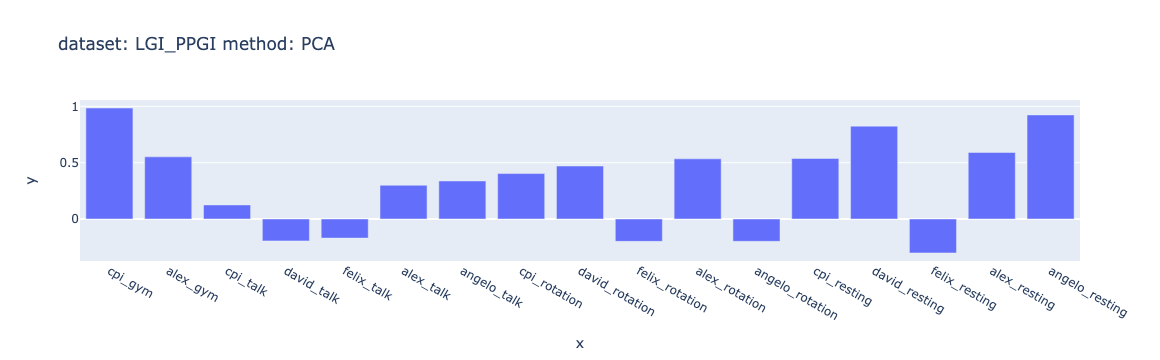

   method     : POS


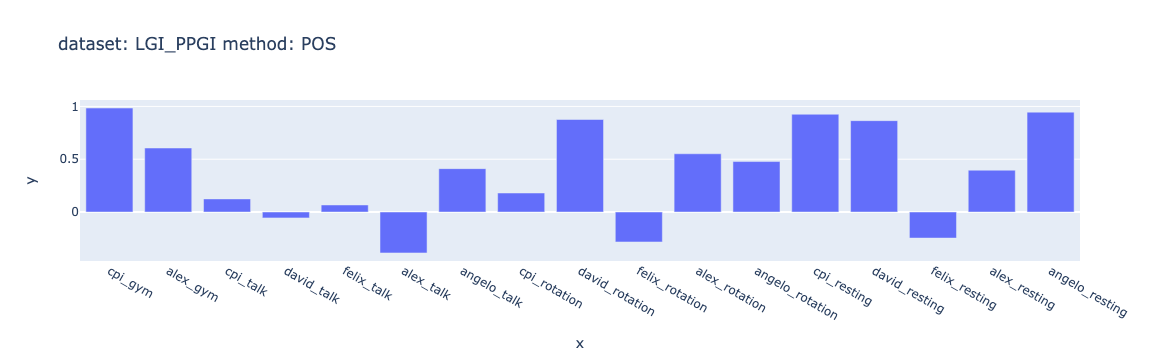

   method     : CHROM


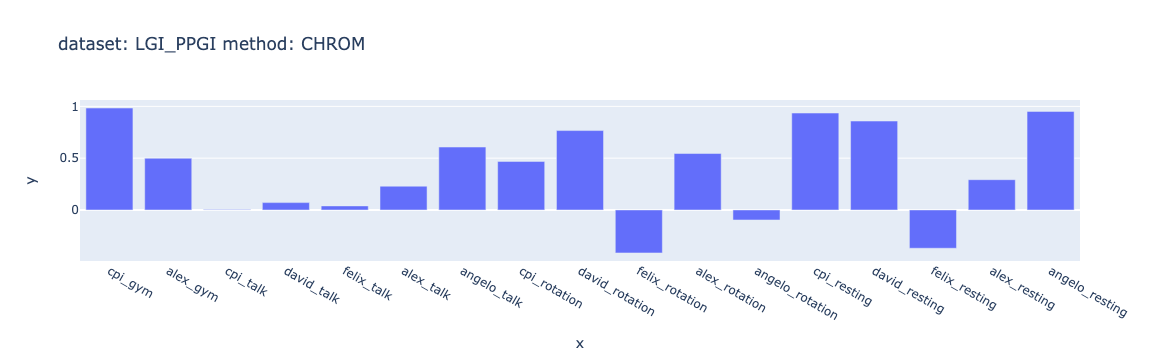

   method     : LGI


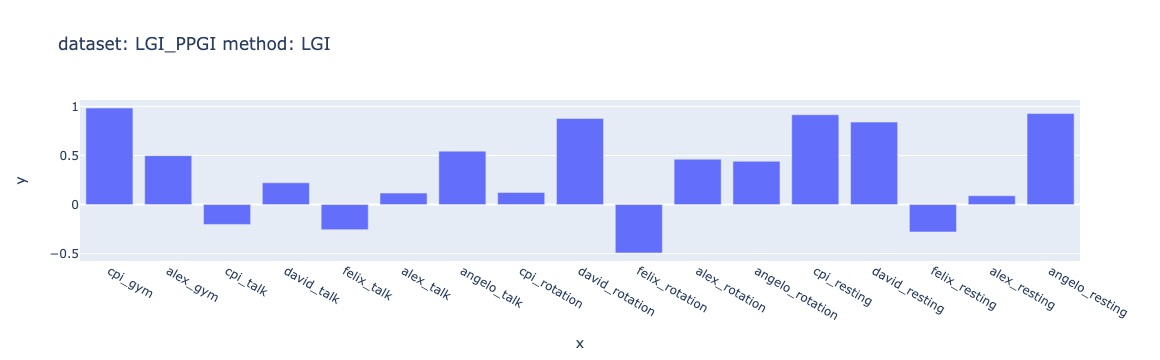

In [325]:
# clustering

method = 'clustering'
DETAILS(dataset, method, metric='PCC')

# Multidataset

In [326]:
# multi dataset
#path = path_results + 'h5_collection'
#st = StatAnalysis(path, join_data=True)
#fig = st.displayBoxPlot(metric='PCC')
#fig.show(renderer = "colab")
